# **Prediksi Harga Pasar Laptop Intel dengan K-Nearest Neighbors (KNN) Berdasarkan Spesifikasi Laptop**
Pada proyek kami yang berjudul 'Prediksi Harga Pasar Laptop Intel dengan K-Nearest Neighbors (KNN) Berdasarkan Spesifikasi Laptop', kami menggunakan algoritma K-Nearest Neighbors (KNN) sebagai pendekatan utama dalam membangun model prediksi. Algoritma KNN adalah metode machine learning yang populer dalam tugas klasifikasi dan regresi. Dalam konteks kami, KNN digunakan untuk memprediksi harga pasar laptop berdasarkan spesifikasi laptop yang diberikan.

Konsep dasar KNN adalah mencari tetangga terdekat (nearest neighbors) dari data yang ingin diprediksi berdasarkan jaraknya dengan data pelatihan yang telah diketahui labelnya. Dalam kasus ini, kita mencari laptop dengan spesifikasi yang paling mirip dengan laptop yang ingin diprediksi harga pasarannya.

Metrik jarak yang umum digunakan dalam KNN adalah jarak Euclidean, di mana jarak antara dua titik dihitung sebagai jarak linier langsung antara keduanya. Dengan mempertimbangkan k-neighbors terdekat dari data yang ingin diprediksi, KNN memberikan prediksi harga pasar laptop Intel berdasarkan harga rata-rata dari tetangga terdekatnya.

Dengan menggunakan pendekatan KNN, kami berharap dapat menghasilkan prediksi yang akurat dan relevan untuk harga pasar laptop Intel berdasarkan spesifikasi laptop yang diberikan, memberikan wawasan yang berharga bagi konsumen dan produsen dalam pengambilan keputusan terkait harga dan spesifikasi laptop

**Daftar Isi**

* Landasan Teori
* Pengertian KNN
* Langkah kerja
* Import Library
* Load data harga laptop
* Bersihkan data yang tidak lengkap
* Definisikan input output data yang menggunakan tipe data integer dan float
* Membagi data untuk training dan validasi (test)
* Membangun machine learning model dengan algoritma K-Nearest Neighbors
* Menggunakan Elbow method untuk menentukan nilak K terbaik
* Menampilkan grafik nilai k berdasarkan MSE
* Melakukan koreksi nilai K dengan menggunakan nilai K terbaik berdasarkan hasil dari Elbow method

**Landasan Teori**

Prediksi Harga Pasar Laptop Intel dengan menggunakan algoritma K-Nearest Neighbors (KNN) didasarkan pada konsep pembelajaran terawasi (supervised learning) dalam machine learning. Dalam pembelajaran terawasi, kita menggunakan dataset yang terdiri dari pasangan fitur dan label (harga pasar laptop). Fitur-fitur laptop seperti ukuran RAM, kapasitas penyimpanan, tipe prosesor, dan fitur-fitur lainnya digunakan sebagai input untuk memprediksi label, yaitu harga pasar laptop.

Algoritma KNN bekerja dengan mencari tetangga terdekat berdasarkan jarak antara spesifikasi laptop yang ingin diprediksi dengan data latih yang ada. Metrik jarak Euclidean sering digunakan untuk mengukur kesamaan antara data. Setelah menemukan tetangga terdekat, KNN melakukan prediksi harga pasar laptop berdasarkan nilai rata-rata dari harga tetangga terdekat tersebut.

Dalam proses pelatihan, model KNN mempelajari hubungan antara fitur-fitur laptop dan harga pasar yang ada dalam data latih. Dengan menyesuaikan hyperparameter seperti jumlah tetangga (K) dan metrik jarak, kinerja model KNN dapat dievaluasi menggunakan metrik evaluasi seperti mean squared error (MSE).

Metrik evaluasi MSE digunakan untuk mengukur sejauh mana prediksi model mendekati nilai sebenarnya (harga pasar laptop). Dalam kasus ini, MSE old model merujuk pada MSE (mean squared error) dari model KNN sebelumnya, sedangkan MSE new model merujuk pada MSE dari model KNN yang diperbarui dengan nilai K terbaik berdasarkan metode Elbow. Improvement (perbaikan) dihitung sebagai selisih antara MSE old model dan MSE new model, yang memberikan gambaran tentang perbaikan atau penurunan kualitas prediksi setelah pembaruan model.

Dengan menggunakan metode evaluasi seperti MSE dan perbandingan antara MSE old model dan MSE new model, kita dapat mengevaluasi performa model KNN dalam prediksi harga pasar laptop berdasarkan spesifikasinya.

**Pengertian KNN**

K-Nearest Neighbor (KNN) adalah suatu metode yang menggunakan algoritma supervised dimana hasil dari query instance yang baru diklasifikan berdasarkan mayoritas darikategori pada KNN. Tujuan dari algoritma ini adalah mengklasifikasikan obyek baru bedasarkan atribut dan training sample. Classifier tidak menggunakan model apapun untukdicocokkan dan hanya berdasarkan pada memori. Diberikan titik query,akan ditemukan sejumlah k obyek atau (titik training) yang paling dekat dengan titik
query. Klasifikasi menggunakan voting terbanyak diantara klasifikasi dari k obyek.. algoritma KNN menggunakan klasifikasi ketetanggaan sebagai nilai prediksi dari query instance yang baru

**Langkah kerja**

Langkah-1: Tentukan jumlah tetangga terdekat (K) yang akan dipertimbangkan sebagai dasar klasifikasi.
Langkah-2: Hitung jarak antara data baru terhadap semua titik data dalam dataset.
Langkah 3: Urutkan jarak pada langkah 2 dari kecil ke besar, lalu ambil titik data dengan jarak terkecil sejumlah K titik.
Langkah-4: Hitung jumlah titik data K pada setiap kelas atau kategori.
Langkah-5: Masukkan data baru ke kelas dengan jumlah K terbanyak.

# **1. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# **2. Import Dataset**

In [2]:
lokasidata='/kaggle/input/data-laptop/laptopss.csv'
row_data = pd.read_csv(lokasidata)
row_data.shape

(100, 9)

# **3. Menampilkan Dataset**

In [3]:
row_data.describe

<bound method NDFrame.describe of     Unnamed: 0                                        Nama Laptop  Processor  \
0            1  HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...          3   
1            2  Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...          3   
2            3  HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...          3   
3            4  ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...          3   
4            9  HP 15s Intel Core i5 12th Gen - (8 GB/512 GB S...          5   
..         ...                                                ...        ...   
95         186  MSI Crosshair 15 Core i7 12th Gen - (16 GB/512...          7   
96         189  acer Aspire Vero(Green PC ) Core i5 11th Gen -...          5   
97         192  HP Pavilion PLUS Core i5 12th Gen - (16 GB/512...          5   
98         195  HP Envy x360 Intel Evo Core i7 12th Gen - (16 ...          7   
99         189  Acer Intel EVO Swift 5 Core i5 11th Gen - (8 G...          5   

    R

# **3. Bersihkan data yang tidak lengkap**

In [4]:
data = row_data.dropna(axis=0)
data.describe()

,Unnamed: 0,Processor,RAM,Storage,Display,Berat,Baterai,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,95.260000,4.62000,10.520000,517.520000,14.987000,1.704800,54.925000,1.127662e+07
std,55.445964,1.35423,3.924747,177.618618,0.846819,0.311112,28.178308,4.234714e+06
min,1.000000,3.00000,4.000000,256.000000,13.300000,1.050000,37.000000,5.000000e+06
25%,48.750000,3.00000,8.000000,512.000000,14.000000,1.500000,42.000000,8.000000e+06
50%,92.000000,5.00000,8.000000,512.000000,15.600000,1.645000,45.000000,1.025000e+07
75%,139.250000,5.00000,16.000000,512.000000,15.600000,1.800000,65.000000,1.400000e+07
max,195.000000,7.00000,16.000000,1000.000000,17.300000,2.600000,240.000000,2.500000e+07


Memeriksa tipe data mana saja yang bernilai integer dan float untuk diolah selanjutnya

In [5]:
print (row_data.dtypes)

Unnamed: 0       int64
Nama Laptop     object
Processor        int64
RAM              int64
Storage          int64
Display        float64
Berat          float64
Baterai        float64
Price            int64
dtype: object


# **4. Definisikan input output data yang menggunakan tipe data integer dan float**

In [6]:
features = ['Processor', 'RAM', 'Storage', 'Display', 'Berat','Baterai']
x = data[features]
y = data['Price']
x.shape, y.shape

((100, 6), (100,))

# **5. Membagi data untuk training dan validasi (test)**

In [7]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 70)

In [8]:
test_y.shape

(25,)

# **6. Membangun machine learning model dengan algoritma K-Nearest Neighbors**

In [9]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model = KNN_Reg(n_neighbors=20)

# model training
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# tes untuk prediksi
testPredict = model.predict(test_x)
score_mse = mse(testPredict, test_y)
score_rmse = np.sqrt(score_mse)
score_mae = mae(testPredict, test_y)
score_mape = mean_absolute_percentage_error(test_y, testPredict)

print('MSE:', score_mse)
print('RMSE:', score_rmse)
print('MAE:', score_mae)
print('MAPE:', score_mape)
print('Accuracy:', acc1)


MSE: 5583357880800.0
RMSE: 2362913.007454993
MAE: 1798148.0
MAPE: 18.609914591672236
Accuracy: 0.5266089155108398


# **7. Menggunakan Elbow method untuk menentukan nilak K terbaik**

In [10]:
# Menentukan rentang nilai K
k_values = range(1, 11)
mse_values = []

# Melakukan iterasi KNN dan menghitung MSE
for k in k_values:
    model = KNN_Reg(n_neighbors=k)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    mse_val = mse(test_y, pred_y)
    mse_values.append(mse_val)

# **8. Menampilkan grafik nilai k berdasarkan MSE**

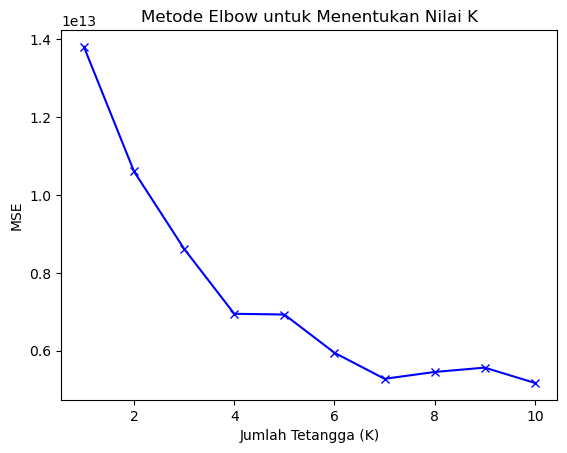

In [11]:
# Plot grafik Elbow
plt.plot(k_values, mse_values, 'bx-')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('MSE')
plt.title('Metode Elbow untuk Menentukan Nilai K')
plt.show()

# **9. Memperoleh Nilai dan Membangun Model Model K Terbaik**

In [12]:
# Memperoleh nilai K terbaik
best_k = np.argmin(mse_values) + 1
print('Nilai K terbaik:', best_k)

# Membangun model dengan nilai K terbaik
best_model = KNN_Reg(n_neighbors=best_k)
best_model.fit(train_x, train_y)

Nilai K terbaik: 10


KNeighborsRegressor(n_neighbors=10)

# **10. Menampilkan Tes Prediksi Berdasarkan MSE**

In [13]:
# Prediction test
testPredict_new = best_model.predict(test_x)
mse_new = mse(test_y, testPredict_new)

print('MSE of new model:', mse_new)
print('MSE of old model:', score_mse)
print('Improvement in MSE:', score_mse - mse_new)

MSE of new model: 5173281567600.0
MSE of old model: 5583357880800.0
Improvement in MSE: 410076313200.0


**Credit**
1. E1E121002_FADIT AL FAUZAN
1. E1E121026_FILDZAH KHALISHAH GHASSANI
2. E1E121072_MUHAMMAD FADLI